# Iris Flower Classification — Kaggle-style Refactor
#
# **Overview**
# This notebook demonstrates:
# - Data loading and preprocessing
# - Feature scaling
# - Label encoding
# - Model training and evaluation
# - Predictions with new samples
#
# The dataset used is the famous *Iris Flower Dataset*.



## Data importing

In [ ]:
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [ ]:
print(df.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    1.000000
std         0.828066      0.433594       1.764420      0.763161    0.819232
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000


In [ ]:
species_count = df['Species'].value_counts()
print("\n🌸 Count of Each Species:")
print(species_count)


🌸 Count of Each Species:
Species
0    50
1    50
2    50
Name: count, dtype: int64


## Data Cleaning

In [ ]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")



Duplicate Rows: 0


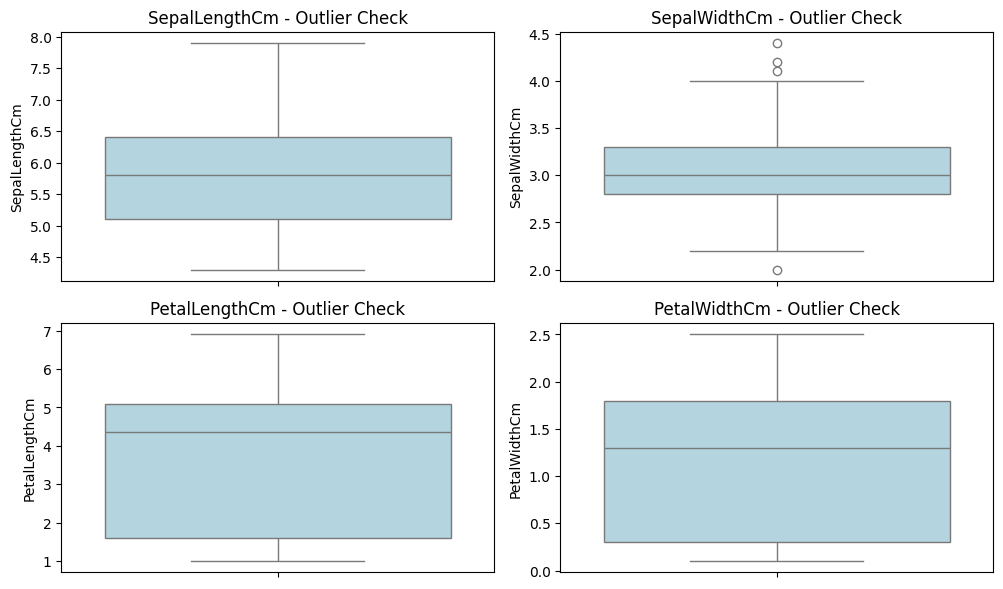

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
for i, col in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col} - Outlier Check')
plt.tight_layout()
plt.show()

## Dropping Irrelevant Features

The Id column is a simple identifier that uniquely labels each sample in the dataset.

It does not contain any predictive information about the flower’s characteristics or species.

Since machine learning models learn patterns from meaningful features, keeping such identifiers can introduce noise and reduce model accuracy.

In [ ]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)
    print("🗑️ 'Id' column removed successfully!")

/tmp/ipython-input-3698270734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='viridis')


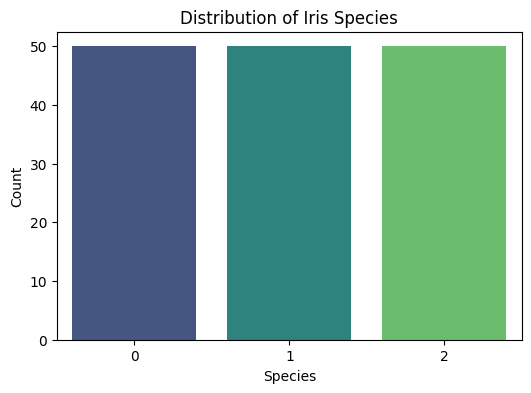

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title("Distribution of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode Species column
df['Species'] = le.fit_transform(df['Species'])

# Show unique mapping
species_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("✅ Species Mapping:", species_mapping)

# Preview the data
print(df.head())


✅ Species Mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


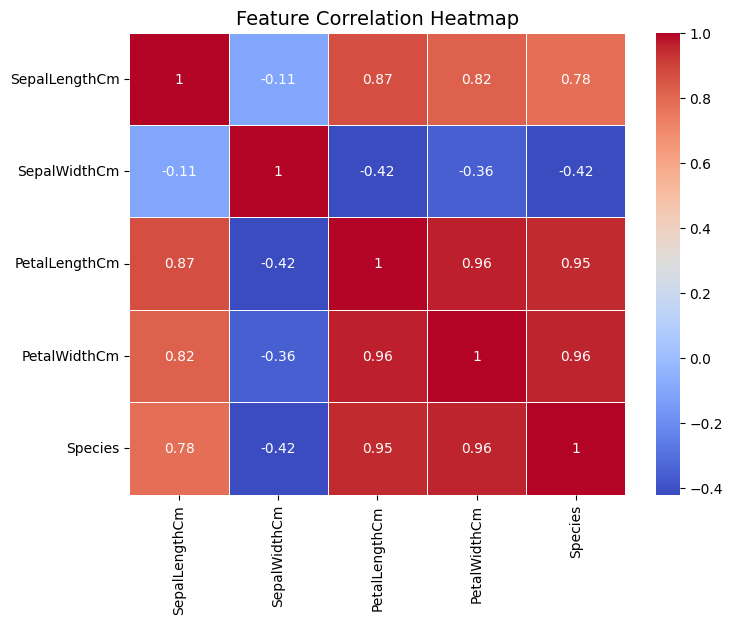

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test data
    random_state=42,
    stratify=y            # ensures equal class proportions
)



🌸 Class Distribution in Training Set:
Species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

🌼 Class Distribution in Testing Set:
Species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


/tmp/ipython-input-29817894.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='cool')
/tmp/ipython-input-29817894.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='magma')


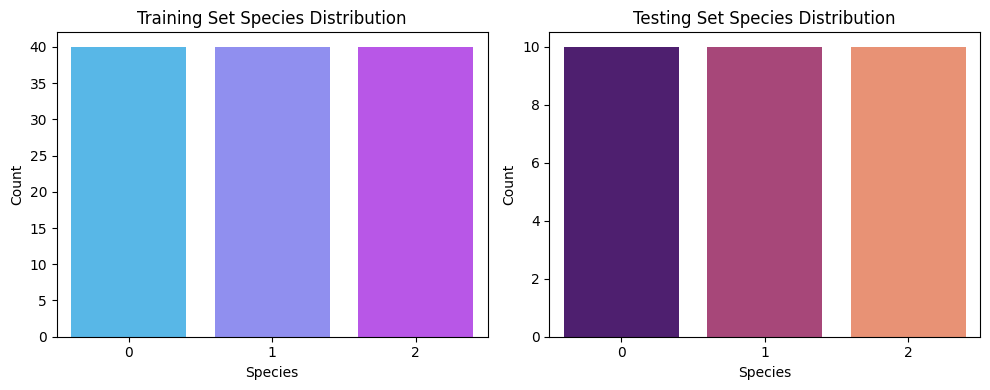

In [ ]:
# ===== Step 1: Remove 'Id' Column if Present =====
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)
    print("🗑️ 'Id' column removed successfully!")

# ===== Step 2: Split Data with Equal Class Distribution =====
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

# Stratified split to keep class distribution balanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ===== Step 3: Check Class Distribution in Train/Test =====
print("\n🌸 Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\n🌼 Class Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))

# ===== Step 4: Visualize Train/Test Class Distribution =====
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))

# Training set plot
plt.subplot(1,2,1)
sns.countplot(x=y_train, palette='cool')
plt.title("Training Set Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

# Testing set plot
plt.subplot(1,2,2)
sns.countplot(x=y_test, palette='magma')
plt.title("Testing Set Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
# ===== Step 1: Import Required Library =====
from sklearn.preprocessing import StandardScaler

# ===== Step 2: Initialize Scaler =====
scaler = StandardScaler()

# ===== Step 3: Fit on Training Data and Transform =====
X_train_scaled = scaler.fit_transform(X_train)

# ===== Step 4: Transform Test Data Using Same Scaler =====
X_test_scaled = scaler.transform(X_test)

# ===== Step 5: Convert Scaled Data Back to DataFrame for Clarity =====
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# ===== Step 6: Display Results =====
print("✅ Feature Scaling Completed Successfully!\n")

print("📊 First 5 rows of Scaled Training Data:")
print(X_train_scaled.head())

print("\n📏 Feature Means After Scaling (should be ~0):")
print(X_train_scaled.mean())

print("\n📏 Feature Standard Deviations After Scaling (should be ~1):")
print(X_train_scaled.std())


✅ Feature Scaling Completed Successfully!

📊 First 5 rows of Scaled Training Data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -1.721568     -0.324840      -1.347036     -1.320168
1      -1.124492     -1.226129       0.414290      0.651867
2       1.144395     -0.550162       0.584741      0.257460
3      -1.124492      0.125805      -1.290219     -1.451638
4      -0.408002     -1.226129       0.130206      0.125991

📏 Feature Means After Scaling (should be ~0):
SepalLengthCm   -1.369275e-16
SepalWidthCm     4.551914e-16
PetalLengthCm   -9.066821e-17
PetalWidthCm     5.366078e-17
dtype: float64

📏 Feature Standard Deviations After Scaling (should be ~1):
SepalLengthCm    1.004193
SepalWidthCm     1.004193
PetalLengthCm    1.004193
PetalWidthCm     1.004193
dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(random_state=42, multi_class='auto', max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Model Accuracy: 93.33%

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:

sample = [[5.0, 3.4, 1.4, 0.2]]  # [SepalLength, SepalWidth, PetalLength, PetalWidth]

# ===== Scale the sample (important!) =====
scaled_sample = scaler.transform(sample)

# ===== Predict numeric label =====
prediction = model.predict(scaled_sample)

# ===== Convert numeric label back to species name =====
predicted_species = le.inverse_transform(prediction)

# ===== Print results =====
print("🔢 Predicted Label:", prediction)
print("🌸 Predicted Species:", predicted_species[0])


🔢 Predicted Label: [0]
🌸 Predicted Species: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# ===== Step 1: Prepare Samples =====
samples = {
    "Setosa": [5.0, 3.4, 1.4, 0.2],
    "Versicolor": [5.9, 2.8, 4.3, 1.3],
    "Virginica": [6.6, 3.0, 5.5, 2.0]
}

# ===== Step 2: Predict After Scaling =====
for name, features in samples.items():
    # Scale sample using same scaler used for training
    scaled_sample = scaler.transform([features])

    # Predict numeric label
    prediction = model.predict(scaled_sample)

    # Convert back to species name
    predicted_species = le.inverse_transform(prediction)

    print(f"🌸 Actual: {name} | 🔮 Predicted: {predicted_species[0]}")


🌸 Actual: Setosa | 🔮 Predicted: Iris-setosa
🌸 Actual: Versicolor | 🔮 Predicted: Iris-versicolor
🌸 Actual: Virginica | 🔮 Predicted: Iris-virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sk